In [1]:
import pandas as pd
import numpy as np
import nltk
import sklearn
import string, re
import urllib
import seaborn as sbn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from nltk.corpus import stopwords

In [2]:
data = pd.read_csv('../../Data/2019/listings122019long.csv')

In [3]:
data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2318,https://www.airbnb.com/rooms/2318,20191219173821,2019-12-20,Casa Madrona - Urban Oasis 1 block from the park!,"Gorgeous, architect remodeled, Dutch Colonial ...","This beautiful, gracious home has been complet...","Gorgeous, architect remodeled, Dutch Colonial ...",none,Madrona is a hidden gem of a neighborhood. It ...,...,t,f,strict_14_with_grace_period,f,f,2,2,0,0,0.23
1,5682,https://www.airbnb.com/rooms/5682,20191219173821,2019-12-20,"Cozy Studio, min. to downtown -WiFi",The Cozy Studio is a perfect launchpad for you...,"Hello fellow travelers, Save some money and ha...",The Cozy Studio is a perfect launchpad for you...,none,NaN,...,f,f,strict_14_with_grace_period,f,t,1,1,0,0,3.89
2,6606,https://www.airbnb.com/rooms/6606,20191219173821,2019-12-19,"Fab, private seattle urban cottage!","This tiny cottage is only 15x10, but it has ev...","Soo centrally located, this is a little house ...","This tiny cottage is only 15x10, but it has ev...",none,"A peaceful yet highly accessible neighborhood,...",...,f,f,strict_14_with_grace_period,f,f,3,3,0,0,1.18
3,9419,https://www.airbnb.com/rooms/9419,20191219173821,2019-12-20,Glorious sun room w/ memory foambed,This beautiful double room features a magical ...,Our new Sunny space has a private room from th...,This beautiful double room features a magical ...,none,"Lots of restaurants (see our guide book) bars,...",...,f,f,moderate,t,t,7,0,7,0,1.29
4,9460,https://www.airbnb.com/rooms/9460,20191219173821,2019-12-20,Downtown Convention Center B&B -- Free Minibar,Take up a glass of wine and unwind on one of t...,Greetings from Seattle. Thanks for considering...,Take up a glass of wine and unwind on one of t...,none,"This is where Downtown meets Capitol Hill, wit...",...,t,f,moderate,f,f,4,3,1,0,3.64


In [4]:
data1 = data.drop(columns=['listing_url','scrape_id','last_scraped','summary','space','description','experiences_offered',
                           'neighborhood_overview','notes','transit','access','interaction','house_rules',
                           'thumbnail_url','medium_url','picture_url','xl_picture_url','host_id','host_url',
                           'host_name','host_since', 'host_location','host_about','host_response_time','host_response_rate',
                           'host_acceptance_rate', 'host_thumbnail_url','host_picture_url', 'host_neighbourhood',
                           'host_listings_count','host_total_listings_count', 'host_verifications','host_has_profile_pic',
                           'host_identity_verified','street', 'city','state','zipcode','market','country_code',
                           'country', 'is_location_exact','bed_type','amenities','square_feet','weekly_price',
                           'monthly_price','security_deposit','guests_included','extra_people','maximum_nights',
                           'minimum_minimum_nights','maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights',
                           'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
                           'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped','first_review',
                           'last_review','review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                           'review_scores_communication', 'review_scores_location','requires_license', 'license',
                           'jurisdiction_names', 'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
                           'require_guest_profile_picture', 'require_guest_phone_verification', 'calculated_host_listings_count',
                           'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms',
                           'calculated_host_listings_count_shared_rooms', 'neighbourhood','smart_location','id','property_type'
                          ])

In [5]:
data1.describe()

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_value,reviews_per_month
count,7968.000000,7968.000000,7968.000000,7967.000000,7961.000000,7964.000000,7968.000000,7968.000000,7968.000000,6809.000000,6809.000000,6858.000000
mean,47.624916,-122.333363,3.662525,1.315175,1.386760,1.912356,14.024096,52.698419,18.046812,95.062417,9.504186,2.309240
std,0.045517,0.031535,2.317617,0.660248,1.001517,1.601943,18.687884,78.504025,24.284183,7.336431,0.793086,2.200196
min,47.495870,-122.419250,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,2.000000,0.000000
25%,47.605520,-122.353032,2.000000,1.000000,1.000000,1.000000,2.000000,3.000000,0.000000,94.000000,9.000000,0.490000
50%,47.619690,-122.332675,3.000000,1.000000,1.000000,1.000000,3.000000,19.000000,7.000000,97.000000,10.000000,1.650000
75%,47.658973,-122.311880,4.000000,1.500000,2.000000,2.000000,30.000000,70.000000,28.000000,99.000000,10.000000,3.570000
max,47.735930,-122.236720,28.000000,16.000000,8.000000,49.000000,400.000000,800.000000,217.000000,100.000000,10.000000,15.880000


In [6]:
data1.head()

,name,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,minimum_nights,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_value,reviews_per_month
0,Casa Madrona - Urban Oasis 1 block from the park!,t,Madrona,Central Area,47.61082,-122.29082,Entire home/apt,9,2.5,4.0,4.0,$296.00,$250.00,7,31,10,100.0,10.0,0.23
1,"Cozy Studio, min. to downtown -WiFi",f,South Delridge,Delridge,47.52398,-122.35989,Entire home/apt,2,1.0,0.0,1.0,$48.00,$45.00,3,462,0,95.0,10.0,3.89
2,"Fab, private seattle urban cottage!",f,Wallingford,Other neighborhoods,47.65411,-122.33761,Entire home/apt,2,1.0,1.0,1.0,$90.00,$40.00,30,150,16,92.0,9.0,1.18
3,Glorious sun room w/ memory foambed,t,Georgetown,Other neighborhoods,47.55062,-122.32014,Private room,2,3.0,1.0,1.0,$62.00,$0.00,2,147,17,93.0,10.0,1.29
4,Downtown Convention Center B&B -- Free Minibar,t,First Hill,Downtown,47.61265,-122.32936,Private room,2,1.0,1.0,1.0,$79.00,$45.00,3,457,54,98.0,10.0,3.64


# Change Price to Numerical and Get rid of NaNs in data

In [7]:
data1['price'] = data1['price'].str.extract('(\d+)', expand=False).astype('float')

In [8]:
data1['cleaning_fee'] = data1['cleaning_fee'].str.extract('(\d+)', expand=False).astype('float')

In [9]:
data1['host_is_superhost'] = (data1['host_is_superhost'] == 't').astype('int')

In [10]:
data1['reviews_per_month'] = data1['reviews_per_month'].fillna(0)
data1['bathrooms'] = data1['bathrooms'].fillna(data1['bathrooms'].mean())
data1['bedrooms'] = data1['bedrooms'].fillna(data1['bedrooms'].mean())
data1['beds'] = data1['beds'].fillna(data1['beds'].mean())
data1['cleaning_fee'] = data1['cleaning_fee'].fillna(data1['cleaning_fee'].mean())
data1['review_scores_rating'] = data1['review_scores_rating'].fillna(0)

In [11]:
data1['longitude'] = data1['longitude'].round(decimals=5)
data1['latitude'] = data1['latitude'].round(decimals=5)

In [12]:
data1 = data1[data1.minimum_nights<31]

# Vectorize Categorical Variables

In [13]:
ohe = OneHotEncoder(sparse=False)
neigh_group = ohe.fit_transform(data1[['neighbourhood_group_cleansed']])
neigh_group_cat = ohe.categories_
neigh = ohe.fit_transform(data1[['neighbourhood_cleansed']])
neigh_cat = ohe.categories_
room = ohe.fit_transform(data1[['room_type']])
room_cat = ohe.categories_
prop = ohe.fit_transform(data1[['room_type']])
prop_cat = ohe.categories_
minimum = ohe.fit_transform(data1[['minimum_nights']])
minimum_cat = ohe.categories_

In [14]:
minimum_cat = minimum_cat[0].astype('str')

In [15]:
minimum_cat = list(minimum_cat)

In [16]:
new_minimum_cat = [(lambda x : f'minimum_nights: {x}')(x) for x in range(len(minimum_cat))]

In [17]:
def rename(name_of_columns,pre_addition):
    new_list = []
    for x in name_of_columns:
        for x in x:
            new_list.append(pre_addition+ '' + x)
    return new_list

In [18]:
new_neigh_group_cat = rename(neigh_group_cat,'neighbourhood_group: ')
new_neigh_cat = rename(neigh_cat,'neighbourhood: ')
new_room_cat = rename(room_cat,'room_type: ')
new_prop_cat = rename(prop_cat, 'property_type: ')

In [19]:
# Create categories for neighborhood_group, neighborhood and room_type
neigh_group_df = pd.DataFrame(data=neigh_group,columns=new_neigh_group_cat)
neigh_df = pd.DataFrame(data=neigh,columns=new_neigh_cat)
room_type_df = pd.DataFrame(data=room,columns = new_room_cat)
property_df = pd.DataFrame(data=prop, columns= new_prop_cat)
minimum_df = pd.DataFrame(data=minimum,columns=new_minimum_cat)

# NLP for Name Category

In [20]:
stopwords_list = stopwords.words('english') + list(string.punctuation)
vectorizer = TfidfVectorizer(strip_accents='unicode',stop_words=stopwords_list,min_df=60,max_df = 800, ngram_range=(1,3))
# get rid of na in name column
data1.fillna({'name':''}, inplace=True)
tf_idf = vectorizer.fit_transform(data['name'])
nlp_name = pd.DataFrame(tf_idf.toarray(), columns=vectorizer.get_feature_names())

In [21]:
# import pickle
# pickle.dump(tf_idf, open('nlp.sav', 'wb'))

# Reconnect DataFrames / Drop Duplicates

In [22]:
clean_data = pd.concat([data1,neigh_group_df,neigh_df,room_type_df,nlp_name,minimum_df],axis=1)

In [23]:
clean_data = clean_data.drop(columns=['name','neighbourhood_cleansed','minimum_nights',
                                      'neighbourhood_group_cleansed','room_type'])

# Remove New/ Unsuccessful Properties

In [24]:
clean_data.describe()

,host_is_superhost,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,number_of_reviews,...,minimum_nights: 9,minimum_nights: 10,minimum_nights: 11,minimum_nights: 12,minimum_nights: 13,minimum_nights: 14,minimum_nights: 15,minimum_nights: 16,minimum_nights: 17,minimum_nights: 18
count,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,...,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000
mean,0.435394,47.624744,-122.333367,3.668736,1.314583,1.385777,1.912685,157.311376,83.714270,53.036990,...,0.002154,0.001393,0.000127,0.000127,0.000760,0.000760,0.000127,0.001140,0.000380,0.397770
std,0.495840,0.045522,0.031520,2.321186,0.660163,1.000765,1.605642,153.093786,71.316643,78.742434,...,0.046359,0.037305,0.011255,0.011255,0.027561,0.027561,0.011255,0.033748,0.019492,0.489469
min,0.000000,47.495870,-122.419250,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,47.605420,-122.353010,2.000000,1.000000,1.000000,1.000000,79.000000,40.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,47.619530,-122.332675,3.000000,1.000000,1.000000,1.000000,115.000000,72.000000,20.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,47.658837,-122.311910,4.000000,1.500000,2.000000,2.000000,180.000000,100.000000,71.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,47.735930,-122.236720,28.000000,16.000000,8.000000,49.000000,999.000000,700.000000,800.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
clean_data = clean_data[clean_data.review_scores_rating>60]

In [26]:
clean_data = clean_data[clean_data.price>20]
clean_data = clean_data[clean_data.price<800]
clean_data = clean_data.dropna()

# Visualize Data

In [27]:
import seaborn as sbn
import statsmodels
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats

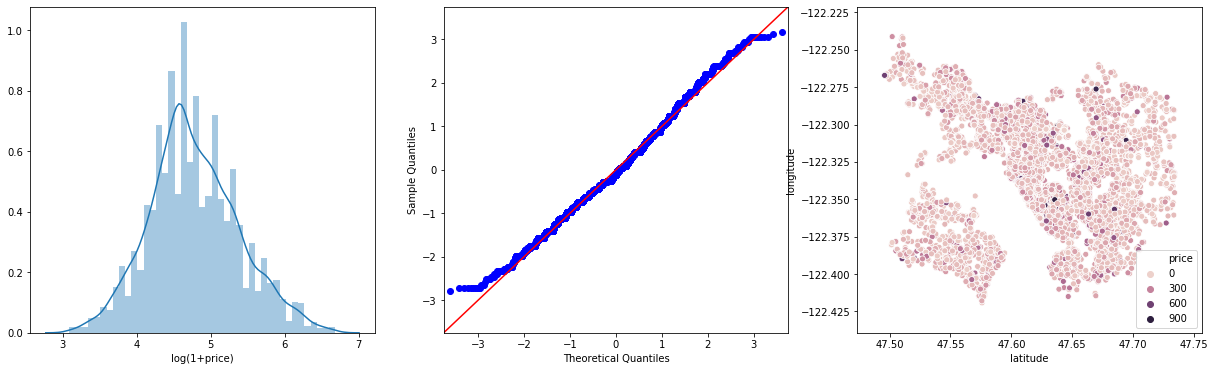

In [28]:
fig, axes = plt.subplots(1,3, figsize=(21,6))
sbn.distplot(np.log1p(clean_data['price']), ax=axes[0])
axes[0].set_xlabel('log(1+price)')
sm.qqplot(np.log1p(clean_data['price']), stats.norm, fit=True, line='45', ax=axes[1])
sbn.scatterplot(x= clean_data['latitude'], y=clean_data['longitude'],hue=clean_data['price'],ax=axes[2]);

# Train Test Split

In [29]:
X = clean_data.drop(columns=['price','number_of_reviews_ltm','review_scores_rating',
                             'review_scores_value','reviews_per_month'])
y = clean_data['price']
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size = .05,random_state=11)

In [30]:
X.columns

Index(['host_is_superhost', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'cleaning_fee', 'number_of_reviews',
       'neighbourhood_group: Ballard',
       ...
       'minimum_nights: 9', 'minimum_nights: 10', 'minimum_nights: 11',
       'minimum_nights: 12', 'minimum_nights: 13', 'minimum_nights: 14',
       'minimum_nights: 15', 'minimum_nights: 16', 'minimum_nights: 17',
       'minimum_nights: 18'],
      dtype='object', length=308)

# Random Forest

In [31]:
rfr = RandomForestRegressor(n_estimators=1000,min_samples_split=5,min_samples_leaf=3,random_state=11)
rfr.fit(Xtrain,ytrain)
rfr.score(Xtrain,ytrain)

0.8834585912382823

In [32]:
ypredtrain = rfr.predict(Xtrain)
ypredtest = rfr.predict(Xtest)

In [33]:
from sklearn.metrics import r2_score, explained_variance_score,mean_absolute_error,mean_squared_error
print(r2_score(ytrain,ypredtrain))
print(r2_score(ytest,ypredtest))

0.8834585912382823
0.6668047457943016


In [34]:
# import pickle
# pickle.dump(rfr, open('rf.sav', 'wb'))

In [34]:
sorted(list(zip(rfr.feature_importances_,X.columns)),reverse=True)[0:15]

[(0.34314839392391927, 'bedrooms'),
 (0.16432128055090725, 'cleaning_fee'),
 (0.07356227235793013, 'latitude'),
 (0.05450615753304827, 'bathrooms'),
 (0.05365211387706209, 'accommodates'),
 (0.048268382975381476, 'longitude'),
 (0.03591798063121673, 'number_of_reviews'),
 (0.014608289928545322, 'suites'),
 (0.01080328771215154, 'beds'),
 (0.0097379705047853, '1bd'),
 (0.008887716706956603, 'views'),
 (0.008467589181022481, 'luxury'),
 (0.005887636511957451, 'home'),
 (0.005465698143998155, 'amazing'),
 (0.005369369847442248, 'domicile')]

In [35]:
list(zip(ytest,ypredtest))[0:10]

[(80.0, 105.12717268842285),
 (224.0, 169.44006868964377),
 (85.0, 68.8273725552226),
 (169.0, 171.36971158008663),
 (85.0, 84.96460600788099),
 (95.0, 83.05585478132978),
 (299.0, 217.09225725842788),
 (125.0, 204.53802976745462),
 (99.0, 93.70212749603347),
 (85.0, 89.44943120213118)]

In [36]:
abs(sum(ytest)-sum(ypredtest))/len(ytest)

1.4132542603481963

In [45]:
y

0       296.0
1        48.0
2        90.0
3        62.0
4        79.0
        ...  
7872     52.0
7878     60.0
7879     76.0
7881     89.0
7889     90.0
Name: price, Length: 6487, dtype: float64

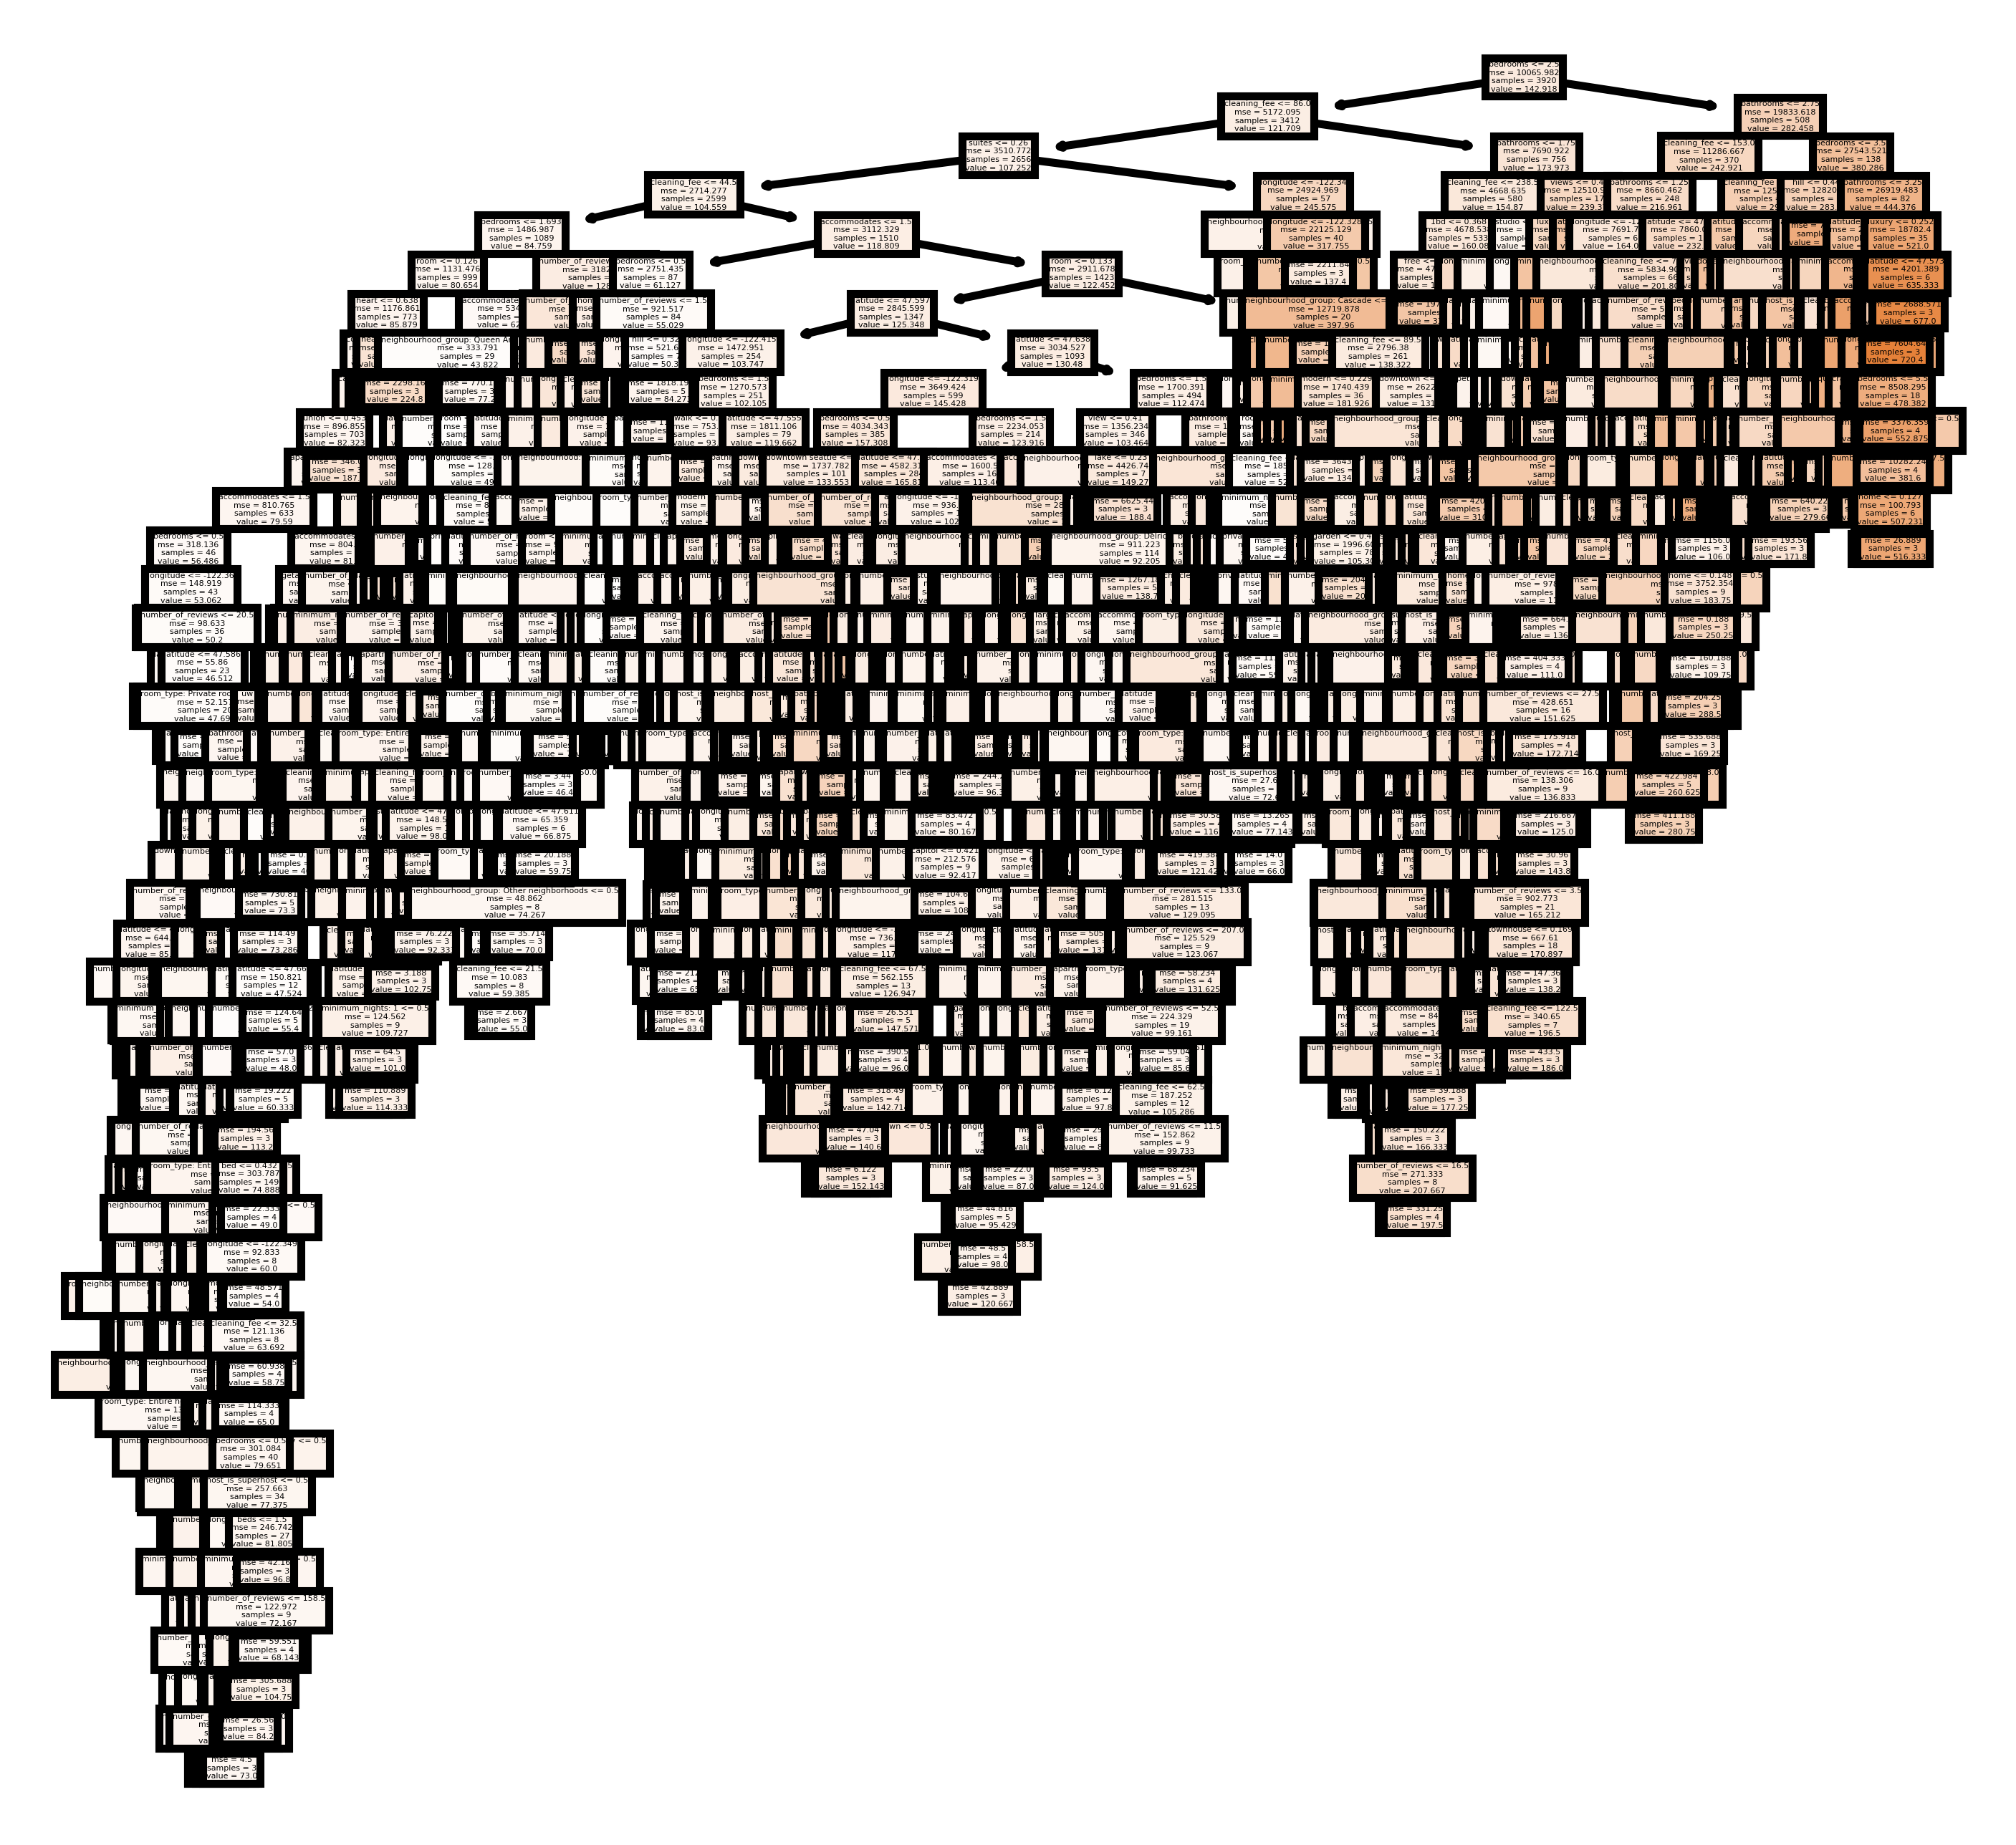

In [52]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rfr.estimators_[0],
               feature_names = X.columns, 
               filled = True);
fig.savefig('rf_individualtree.png')


# Neural Net

In [40]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Dropout
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import KFold

In [41]:
model = Sequential()
model.add(Dense(len(X.columns), input_dim=len(X.columns), kernel_initializer='normal', activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 308)               95172     
_________________________________________________________________
dense_1 (Dense)              (None, 200)               61800     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 201       
Total params: 157,173
Trainable params: 157,173
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [43]:
history = model.fit(Xtrain, ytrain, epochs=100, batch_size=3,  verbose=1, validation_split=0.2)

Train on 4670 samples, validate on 1168 samples
Epoch 1/100
4670/4670 [==============================] - 2s 376us/sample - loss: 6760.3611 - mean_squared_error: 6760.3643 - mean_absolute_error: 55.8816 - val_loss: 5867.7037 - val_mean_squared_error: 5867.7061 - val_mean_absolute_error: 49.4229
Epoch 2/100
4670/4670 [==============================] - 2s 340us/sample - loss: 5740.3187 - mean_squared_error: 5740.3203 - mean_absolute_error: 51.1705 - val_loss: 5285.2822 - val_mean_squared_error: 5285.2793 - val_mean_absolute_error: 48.0912
Epoch 3/100
4670/4670 [==============================] - 2s 339us/sample - loss: 5268.6194 - mean_squared_error: 5268.6177 - mean_absolute_error: 49.1806 - val_loss: 4940.9316 - val_mean_squared_error: 4940.9321 - val_mean_absolute_error: 46.1679
Epoch 4/100
4670/4670 [==============================] - 2s 339us/sample - loss: 5025.2509 - mean_squared_error: 5025.2480 - mean_absolute_error: 47.6647 - val_loss: 4588.0622 - val_mean_squared_error: 4588.0605

In [56]:
nnpreds = []
for x in model.predict(Xtest):
    for x in x:
        nnpreds.append(x)

In [59]:
abs(sum(ytest)-sum(nnpreds))/len(ytest)

5.5039009482173595

In [37]:
print(explained_variance_score(ytest,ypredtest))
# print(explained_variance_score(ytest,nnpreds))

0.6670197026227429


In [38]:
print(mean_absolute_error(ytest,ypredtest))
# print(mean_absolute_error(ytest,nnpreds))

33.80013775637232


In [69]:
print(r2_score(ytest,ypredtest))
print(r2_score(ytest,nnpreds))

0.6554780760704197
0.4724748616478245


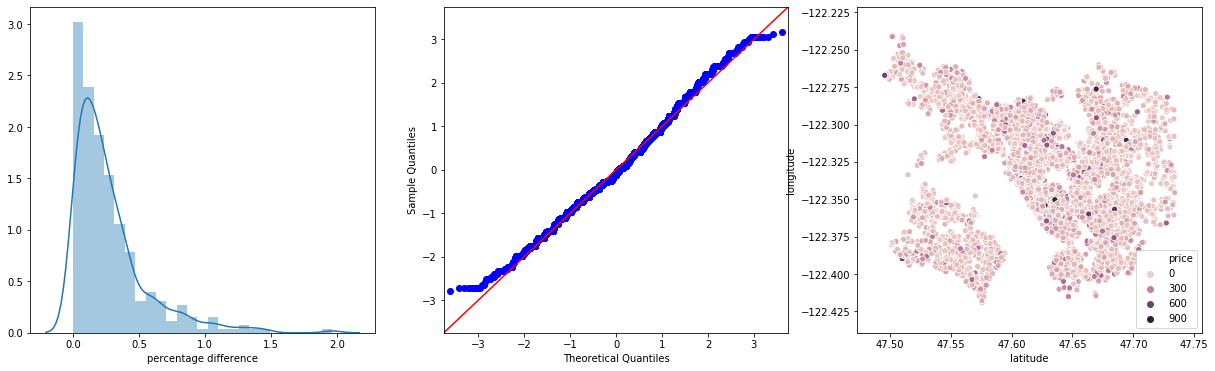

In [40]:
fig, axes = plt.subplots(1,3, figsize=(21,6))
sbn.distplot(list(abs(ytest-ypredtest)/ytest), ax=axes[0])
axes[0].set_xlabel('percentage difference')
sm.qqplot(np.log1p(clean_data['price']), stats.norm, fit=True, line='45', ax=axes[1])
sbn.scatterplot(x= clean_data['latitude'], y=clean_data['longitude'],hue=clean_data['price'],ax=axes[2]);

In [82]:
len(ytest)

649

In [76]:
list(abs(ytest-ypredtest)/ytest)

[0.28371065399061857,
 0.21443316348829772,
 0.18696898493663125,
 0.014178270020577626,
 0.01180772668508041,
 0.11627068086883831,
 0.2812034716491237,
 0.6308809141081151,
 0.08020666048317383,
 0.07480100164541337,
 0.39240376996267595,
 0.12662474002188182,
 0.16140298810336765,
 0.04539689933997594,
 0.3304040288530917,
 0.0532056948102409,
 0.2706582792207789,
 0.3405119963369955,
 0.2448531383587179,
 0.1350764951658881,
 0.149180395946646,
 0.2082918584894531,
 0.21895671757131674,
 0.19739239940059974,
 0.1806344643036194,
 0.15683229942279947,
 0.03750748967406677,
 0.7829722161853737,
 0.3762860053194699,
 0.8429310428064002,
 0.011026543609647558,
 0.2843245670995665,
 0.05652452827265411,
 0.2981231894717473,
 0.11423213095931857,
 0.3467792424024774,
 0.3110992425042277,
 0.026473353156814174,
 0.1608304612054614,
 0.04355471481380545,
 0.0579378915182037,
 0.0683342640970136,
 0.1415393999659154,
 0.35635583046211206,
 0.03349506395666204,
 0.20154735753135739,
 0.22158

In [74]:
sum(abs(ytest-nnpreds)/ytest)/len(ytest)

0.34205003650463206

In [64]:
list(zip(abs(ytest-nnpreds),abs(ytest-ypredtest)))

[(15.648628234863281, 22.696852319249487),
 (50.89109802246094, 48.03302862137869),
 (8.73004150390625, 15.892363719613655),
 (2.898773193359375, 2.3961276334776187),
 (0.05821990966796875, 1.003656768231835),
 (41.149417877197266, 11.04571468253964),
 (173.64623260498047, 84.07983802308797),
 (59.34028625488281, 78.86011426351439),
 (24.519081115722656, 7.94045938783421),
 (3.9946670532226562, 6.358085139860137),
 (56.986839294433594, 62.78460319402815),
 (81.4400634765625, 17.727463603063455),
 (27.200119018554688, 15.978895822233397),
 (68.48664855957031, 5.9015969141968725),
 (16.720176696777344, 26.432322308247336),
 (5.511383056640625, 5.267363786213849),
 (24.276580810546875, 67.66456980519473),
 (24.130386352539062, 25.878911721611658),
 (108.25265502929688, 116.305240720391),
 (36.13450622558594, 13.372573021422923),
 (5.5400543212890625, 26.85247127039628),
 (7.3840484619140625, 17.704807971603515),
 (0.6636276245117188, 27.369589696414593),
 (22.061309814453125, 49.348099850

In [58]:
list(zip(nnpreds,ytest,ypredtest))

[(95.64863, 80.0, 102.69685231924949),
 (173.1089, 224.0, 175.9669713786213),
 (76.26996, 85.0, 69.10763628038634),
 (166.10123, 169.0, 171.39612763347762),
 (85.05822, 85.0, 86.00365676823183),
 (53.850582, 95.0, 83.95428531746036),
 (125.35377, 299.0, 214.92016197691203),
 (184.34029, 125.0, 203.8601142635144),
 (74.48092, 99.0, 91.05954061216579),
 (81.00533, 85.0, 91.35808513986014),
 (103.01316, 160.0, 97.21539680597185),
 (58.559937, 140.0, 122.27253639693654),
 (71.79988, 99.0, 83.0211041777666),
 (198.48665, 130.0, 124.09840308580313),
 (96.72018, 80.0, 106.43232230824734),
 (104.51138, 99.0, 93.73263621378615),
 (225.72342, 250.0, 182.33543019480527),
 (100.13039, 76.0, 101.87891172161166),
 (366.74734, 475.0, 358.694759279609),
 (135.1345, 99.0, 112.37257302142292),
 (185.54005, 180.0, 206.85247127039628),
 (92.38405, 85.0, 67.29519202839649),
 (125.66363, 125.0, 97.6304103035854),
 (272.0613, 250.0, 200.65190014985006),
 (130.0579, 124.0, 146.3986735736488),
 (327.12027, 450

In [ ]:
list(data1.columns)

In [ ]:
list(X.columns)